In [1]:
from __future__ import print_function
import sys

print('Hello world!')
print('Alarming hello!', file=sys.stderr)
print('Hello again!')
'And again!'

Hello world!
Hello again!


Alarming hello!


'And again!'

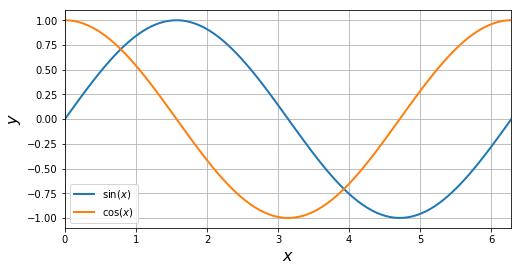

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# generate a pair of sinusoids
x = np.linspace(0., 2. * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# produce a new figure object with a defined (width, height) in inches
fig = plt.figure(figsize=(8, 4))
# add a single axis to the figure
ax = fig.add_subplot(111)
# plot the two sinusoidal traces on the axis, adjusting the line width
# and adding LaTeX legend labels
ax.plot(x, y1, linewidth=2, label=r'$\sin(x)$')
ax.plot(x, y2, linewidth=2, label=r'$\cos(x)$')
# set the axis labels
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
# force the legend to be displayed
ax.legend()
# adjust the limits of the horizontal axis
ax.set_xlim(0., 2. * np.pi)
# make a grid be displayed in the axis background
ax.grid('on')

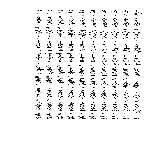

Image target: [9 8 7 8 9 1 8 9 9 8 1 3 0 6 6 5 9 5 2 7 0 9 8 7 1 1 6 4 1 1 4 4 4 2 7 5 0
 5 5 3 7 1 1 6 2 1 0 0 7 1 8 9 9 7 5 8 2 5 4 0 2 0 6 4 5 4 7 9 6 2 9 6 8 9
 4 9 4 5 6 0 6 1 9 1 7 5 6 9 0 1 9 6 0 5 7 0 0 5 6 6]


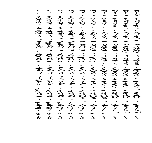

Image target: [6 4 1 6 7 0 7 0 7 3 2 9 8 1 3 9 9 6 9 0 8 3 7 1 2 1 2 3 3 5 5 8 6 8 4 8 4
 0 4 9 2 7 9 3 3 7 7 2 3 2 7 6 7 4 2 0 7 6 4 1 4 7 7 5 5 2 1 3 5 0 7 1 3 5
 5 2 0 7 9 0 2 5 5 8 6 1 3 8 6 7 7 6 6 4 8 6 6 1 9 7]


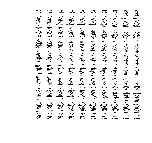

Image target: [7 4 2 3 1 7 7 3 8 9 1 3 4 7 3 0 7 3 1 5 8 9 9 2 0 8 1 8 8 6 2 9 4 0 8 3 1
 7 0 7 5 1 5 4 5 9 8 2 0 9 3 0 9 8 5 6 3 1 5 9 2 8 6 4 1 5 8 8 7 7 7 4 6 6
 3 4 2 1 3 7 5 1 5 2 7 9 0 2 3 9 6 0 8 0 8 2 0 6 0 6]


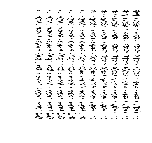

Image target: [8 7 4 3 0 7 5 0 3 2 3 8 9 6 2 4 0 7 0 6 1 8 3 9 0 8 0 1 6 3 2 8 2 6 3 3 6
 0 6 1 4 3 5 5 4 7 9 1 1 1 6 9 5 0 0 5 0 2 4 4 8 7 1 5 3 1 3 3 3 7 5 1 3 9
 3 1 9 5 6 9 8 6 8 3 3 4 1 2 3 4 3 1 5 5 2 1 8 9 6 0]


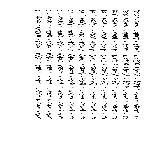

Image target: [9 9 7 1 5 4 5 6 7 5 8 4 5 7 0 6 2 3 7 6 8 5 3 5 9 7 7 6 9 5 7 0 9 4 5 7 3
 1 8 5 3 0 1 0 8 3 6 4 4 7 0 7 8 2 4 6 1 1 7 6 7 4 9 1 2 2 7 0 2 4 7 1 0 8
 2 7 9 0 1 1 6 3 7 0 1 7 3 3 6 6 1 1 8 6 7 5 0 3 8 4]


In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mlp.data_providers as data_providers

def show_single_image(img, fig_size=(2, 2)):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    plt.show()
    return fig, ax

# An example for a single MNIST image
mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=100, max_num_batches=5, shuffle_order=True)

for inputs, target in mnist_dp:
    show_single_image(inputs.reshape((28*10, 28*10)))
    print('Image target: {0}'.format(target))


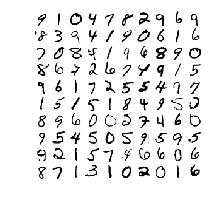

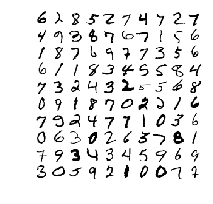

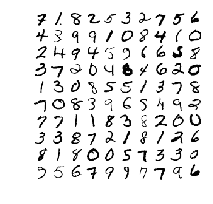

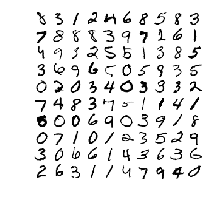

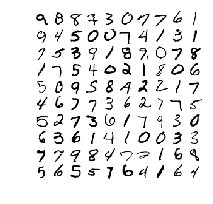

In [13]:
def show_batch_of_images(img_batch, fig_size=(3, 3)):
    fig = plt.figure(figsize=fig_size)
    batch_size, im_height, im_width = img_batch.shape
    # calculate no. columns per grid row to give square grid
    grid_size = int(batch_size**0.5)
    # intialise empty array to tile image grid into
    tiled = np.empty((im_height * grid_size, 
                      im_width * batch_size // grid_size))
    # iterate over images in batch + indexes within batch
    for i, img in enumerate(img_batch):
        # calculate grid row and column indices
        r, c = i % grid_size, i // grid_size
        tiled[r * im_height:(r + 1) * im_height, 
              c * im_height:(c + 1) * im_height] = img
    ax = fig.add_subplot(111)
    ax.imshow(tiled, cmap='Greys')
    ax.axis('off')
    fig.tight_layout()
    plt.show()
    return fig, ax

batch_size = 100
num_batches = 5

mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=batch_size, 
    max_num_batches=num_batches, shuffle_order=True)

for inputs, target in mnist_dp:
    # reshape inputs from batch of vectors to batch of 2D arrays (images)
    _ = show_batch_of_images(inputs.reshape((batch_size, 28, 28)))